# 15 Structured arrays

## Preliminary 1: python `tuples`
A `tuple` is essentially an *immutable* list. Because it cannot be modified, it is a very light-weight object, appropriate to represent data that really should not change...
`tuples` are declared using regular parentheses. They can often be replaced by arrays in function calls, but not always (see later).

In addition to dictionaries, we now know of 4 types of containers:

In [6]:
import numpy as np
u_tuple = (1,2,3)
u_list = [1,2,3]
u_set = {1,2,3}
u_ndarray = np.array([1,2,3])
print(u_tuple, type(u_tuple), u_tuple.__sizeof__())
print(u_list, type(u_list), u_list.__sizeof__())
print(u_set, type(u_set), u_set.__sizeof__())
print(u_ndarray, type(u_ndarray), u_array.__sizeof__())


(1, 2, 3) <class 'tuple'> 48
[1, 2, 3] <class 'list'> 72
{1, 2, 3} <class 'set'> 200


NameError: name 'u_array' is not defined

## Preliminary 2: numpy dtypes

When creating ndarrays, we never worried about the type of data we were storing, *de facto* assuming that they were floats (`really `np.float64`, really).

numpy has a mechanism to specify the type of data we want to store in a ndarray. This helps making sure memory is managed properly. for instance an array of booleans and floats do not require the same amount of memory to be stored

In [7]:
boolArray = np.ones((3,4), dtype = np.bool)
floatArray = np.ones((3,4), dtype = np.float64)

print(boolArray.__sizeof__(), boolArray.nbytes)
print(floatArray.__sizeof__(), floatArray.nbytes)

140 12
224 96


numpy has a list of basic dtypes [see](https://numpy.org/doc/stable/reference/arrays.dtypes.html#arrays-dtypes-constructing).


We can also create new types. Say we want to keep track of a list of dogs, their age and weight.
We could use a list of dict or a dict of list whose entries are 'name', a string, 'age', an integer, and 'weight', a float.
```
dogsLD = [{'name':'Rex', 'age':9, 'weight':81.0},
          {'name':'Fido', 'age':3, 'weight':15.0}]
```
or
```
dogsDL = {'name':['Rex', 'Fido'], 'age':[8,3], 'weight':[81.0, 15.0]}
```

Instead, we will create a new `dtype` representing the information we want to store, and a one dimensional array of records, a [*structured arrays*](https://numpy.org/doc/stable/user/basics.rec.html#) (also sometimes called *record arrays*).


In [8]:
# create a new data type:
dataType = [('name', 'U10'), ('age', 'i'), ('weight', 'f')]

Here, `'U10'` menas a *unicode string* of length at most 10, `'i'`, an int, and `'f'`, a float [(see)](https://numpy.org/doc/stable/reference/arrays.interface.html#arrays-interface) or this table:

![dtypes2.png](dtypes2.png)


Let's now create a list of records matching this data type:

In [9]:
data = [('Rex', 9, 81.0), 
        ('Fido', 3, 15.0)]

We can now create a *structured array* storing data, and the informations on what it represent: 

In [10]:
dogs = np.array(data, dtype = dataType)

We are *literally* telling numpy that `dogs` is a one-dimensional list of `dataType` records.

Because `dogs` is an array, we can easily access each record:

In [11]:
print(dogs)
print(dogs[0])

[('Rex', 9, 81.) ('Fido', 3, 15.)]
('Rex', 9, 81.0)


This is essentially equivalent to what we could do if storing the same information as a `list` of `dicts`:

In [12]:
dogsLD = [{'name':'Rex', 'age':9, 'weight':81.0},
          {'name':'Fido', 'age':3, 'weight':15.0}]

print(dogsLD)
print(dogsLD[0])

[{'name': 'Rex', 'age': 9, 'weight': 81.0}, {'name': 'Fido', 'age': 3, 'weight': 15.0}]
{'name': 'Rex', 'age': 9, 'weight': 81.0}


The *structured* parts is that we told numpy that each row of `dogs` consists of the same type of data, so that it is essentially a 2d array whose columns corresponds to the 'name', 'age', and 'weight' fields...

In [13]:
print(dogs['name'])
print(dogs['age'][0])

['Rex' 'Fido']
9


This is similar to what we could do if we's store all the dogs informations as a `dict` of `lists`:

In [14]:
dogsDL = {'name':['Rex', 'Fido'], 'age':[8,3], 'weight':[81.0, 15.0]}
print(dogsDL['name'])
print(dogsDL['age'][0])

['Rex', 'Fido']
8


The usual rules about array sections etc still apply:

In [15]:
print(dogs[['name', 'weight']])
print(dogs[[1,0]])

[('Rex', 81.) ('Fido', 15.)]
[('Fido', 3, 15.) ('Rex', 9, 81.)]


Note that you may encounter a different syntax for `dtype`. They are strictly equivalent

In [16]:
dataType2 = {'names':('name', 'age', 'weight'),
             'formats':('U10', 'i', 'f')}
dogs2 = np.array(data, dtype=dataType2)
print(dogs2)

[('Rex', 9, 81.) ('Fido', 3, 15.)]


In [17]:
dogs == dogs2

array([ True,  True])

Adding new records can be done by concatenation:

In [18]:
mydog = np.array([('Marvin', 12, 25)], dtype=dataType)
print(mydog)
dogs = np.concatenate((dogs,mydog))
print(dogs)

[('Marvin', 12, 25.)]
[('Rex',  9, 81.) ('Fido',  3, 15.) ('Marvin', 12, 25.)]


Sorting is a bliss too:

In [19]:
dogsByAge = np.sort(dogs, order = 'age')
print(dogsByAge)

[('Fido',  3, 15.) ('Rex',  9, 81.) ('Marvin', 12, 25.)]


In [20]:
oldDogs = dogs[dogs['age']>5]
print(oldDogs)
smallDogs = dogs[dogs['weight'] < 20]
print(smallDogs)

[('Rex',  9, 81.) ('Marvin', 12, 25.)]
[('Fido', 3, 15.)]


# Creating a structured array from a text file:

Let's convert the grades file from homework 2 into a structured array. We need to describe the type of data in the file 

In [21]:
gradesType = [('First_name','U64'),
              ('Last_name', 'U64'),
              ('Student number', 'U10'),
              ('Quizzes', 'f'),
              ('HW1', 'f'),
              ('HW2', 'f'),
              ('HW3', 'f'),
              ('Exam1', 'f'),
              ('Exam2', 'f'),
              ('Final_exam','f')]
grades = np.genfromtxt('grades.csv', 
                       dtype = gradesType, 
                       delimiter = ',',
                       autostrip=True,
                       comments='#')

In [22]:
grades['HW1'][0:10]

array([77., 76., 79., 75., 76., 70., 81., 75., 75., 70.], dtype=float32)

## Structured arrays and matplotlib

Matplotlib can leverage structured arrays. 

If the quantities we want to plot are stored in a dictionary or a structured array, we can refer to them by name, instead of 
```
points = {'X':[0,1,2,3,4], 'Y':[3,4,2,8,0]}
ax.plot(points['X'], points['Y'])
```
we can use the `data` optional keyword and give keys instead of arrays:
```
points = {'X':[0,1,2,3,4], 'Y':[3,4,2,8,0]}
ax.plot('X', 'Y', data = points)
```

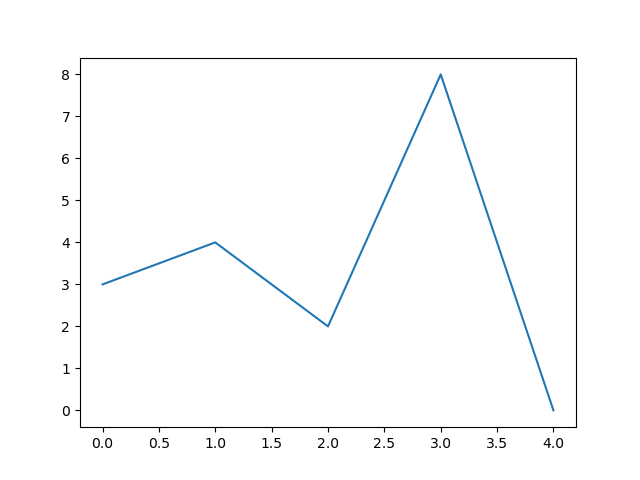

In [23]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

points = {'X':[0,1,2,3,4], 'Y':[3,4,2,8,0]}

fig, ax = plt.subplots()
ax.plot('X', 'Y', data = points)

Let's plot a histogram of the HW1 scores:

Text(0.5, 1.0, 'HW1')

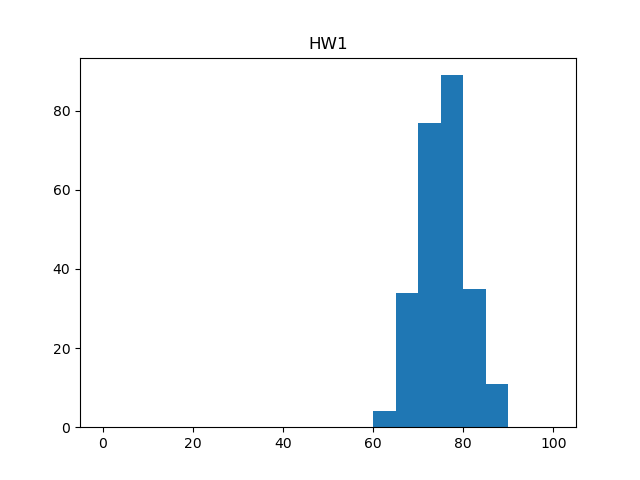

In [24]:
fig, ax = plt.subplots()
ax.hist('HW1',data = grades, bins=20,range = (0,100))
ax.set_title('HW1')

Let's do a more interactive version using `interact`:

interactive(children=(Dropdown(description='k', options=('Quizzes', 'HW1', 'HW2', 'HW3', 'Exam1', 'Exam2', 'Fi…

<function __main__.<lambda>(k)>

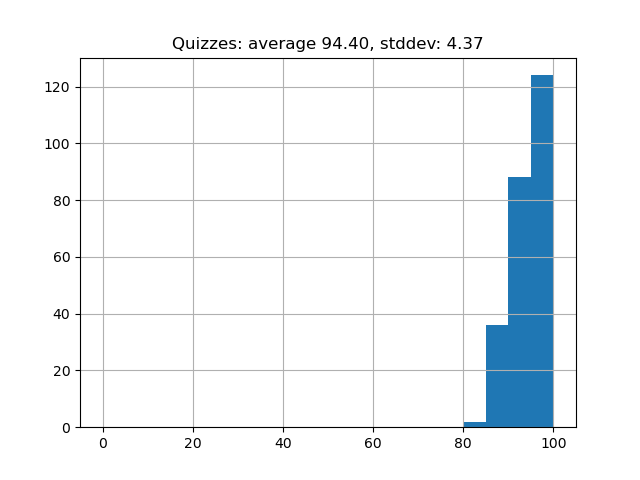

In [25]:
from ipywidgets import interact
def plotGrades(G,key):
    ax.cla()
    ax.hist(key,data = G, bins=20,range = (0,100))
    avg = np.average(grades[key])
    stddev = np.std(grades[key])
    ax.set_title(f'{key}: average {avg:2.2f}, stddev: {stddev:2.2f}')
    ax.grid()

fig, ax = plt.subplots()
keys = list(grades.dtype.fields)[3:]

interact(lambda k : plotGrades(grades,k), k = keys)

## Adding 'columns' (or fields) to a structured array

Let's add a 'breed' field to our dogs database

In [26]:
from numpy.lib.recfunctions import append_fields

In [28]:
newField = ['breed']
newData = [('German shepherd', 'poodle', 'mutt')]
newdType = [('U32')]
dogs2 = append_fields(dogs, names = newField, dtypes = newdType, data = newData)


In [29]:
# np.average(list(grades[2])[3:])

Let's add a final grade column to our grade file

In [33]:
newField = ['Final_grade']
finalGrades = [np.average(list(rec)[3:]) for rec in grades]
newdType = [('f')]
newGrade = append_fields(grades, names = newField, dtypes = newdType, data = finalGrades)

ValueError: The number of arrays does not match the number of names

In [ ]:
from ipywidgets import interact
def plotGrades(G,key):
    ax.cla()
    ax.hist(key,data = G, bins=20,range = (0,100))
    avg = np.average(grades[key])
    stddev = np.std(grades[key])
    ax.set_title(f'{key}: average {avg:2.2f}, stddev: {stddev:2.2f}')
    ax.grid()

fig, ax = plt.subplots()
keys = list(grades.dtype.fields)[3:]

interact(lambda k : plotGrades(newGrade,k), k = keys)